Limpieza del archivo "attacks.csv" 

In [1]:
import pandas as pd
import numpy as np
import re
import pycountry

In [2]:
# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [88]:
data_or=pd.read_csv('../raw_data/attacks.csv',  encoding='ANSI')


In [89]:
data = data_or.copy()

data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [90]:
data.shape

(25723, 24)

In [91]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [92]:
uniqueValues = data.nunique()

uniqueValues

Case Number               6287
Date                      5433
Year                       249
Type                         8
Country                    212
Area                       825
Location                  4108
Activity                  1532
Name                      5230
Sex                          6
Age                        157
Injury                    3737
Fatal (Y/N)                  8
Time                       366
Species                   1549
Investigator or Source    4969
pdf                       6291
href formula              6290
href                      6285
Case Number.1             6285
Case Number.2             6286
original order            6308
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [7]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
new_cols = [c.lower().strip().replace(' ', '_').replace('_(y/n)','').replace('.1','.a').replace('.2','.b').replace(':_22','.a').replace(':_23','.b') for c in data.columns]

new_cols


['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number.a',
 'case_number.b',
 'original_order',
 'unnamed.a',
 'unnamed.b']

In [9]:
dict(zip(data.columns, new_cols))

{'Case Number': 'case_number',
 'Date': 'date',
 'Year': 'year',
 'Type': 'type',
 'Country': 'country',
 'Area': 'area',
 'Location': 'location',
 'Activity': 'activity',
 'Name': 'name',
 'Sex ': 'sex',
 'Age': 'age',
 'Injury': 'injury',
 'Fatal (Y/N)': 'fatal',
 'Time': 'time',
 'Species ': 'species',
 'Investigator or Source': 'investigator_or_source',
 'pdf': 'pdf',
 'href formula': 'href_formula',
 'href': 'href',
 'Case Number.1': 'case_number.a',
 'Case Number.2': 'case_number.b',
 'original order': 'original_order',
 'Unnamed: 22': 'unnamed.a',
 'Unnamed: 23': 'unnamed.b'}

In [10]:
data = data.rename(columns={k:v for k,v in zip(data.columns, new_cols)}) # k=columna vieja, v= columna nueva



In [11]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal                     19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.a             19421
case_number.b             19421
original_order            19414
unnamed.a                 25722
unnamed.b                 25721
dtype: int64

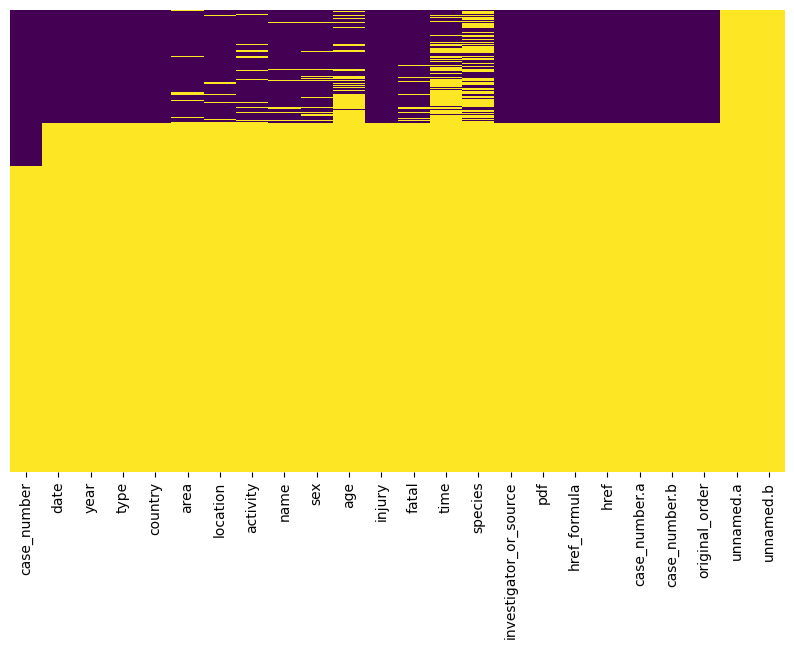

In [12]:
plt.figure(figsize=(10,6))

sns.heatm   ap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

In [13]:
data.dropna(inplace=True, subset=['date', 'year', 'type', 'pdf'])

In [14]:
data.shape

(6296, 24)

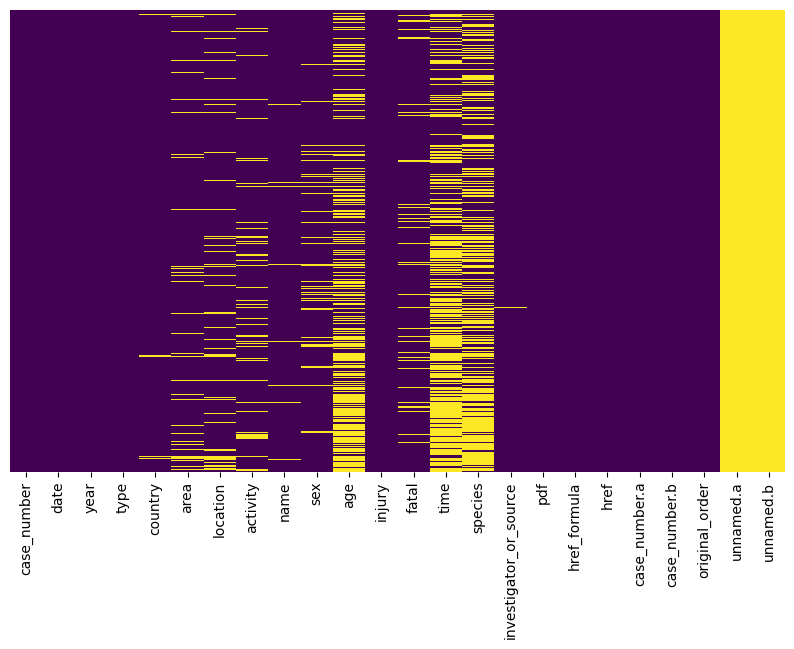

In [15]:
plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

In [16]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

case_number                  1
country                     50
area                       453
location                   538
activity                   544
name                       210
sex                        565
age                       2827
injury                      28
fatal                      537
time                      3349
species                   2833
investigator_or_source      16
href_formula                 1
unnamed.a                 6295
unnamed.b                 6294
dtype: int64

In [17]:
data.dropna(inplace=True, subset=['species'])
data.dropna(inplace=True, subset=['country', 'area', 'location'])
data.shape

(3203, 24)

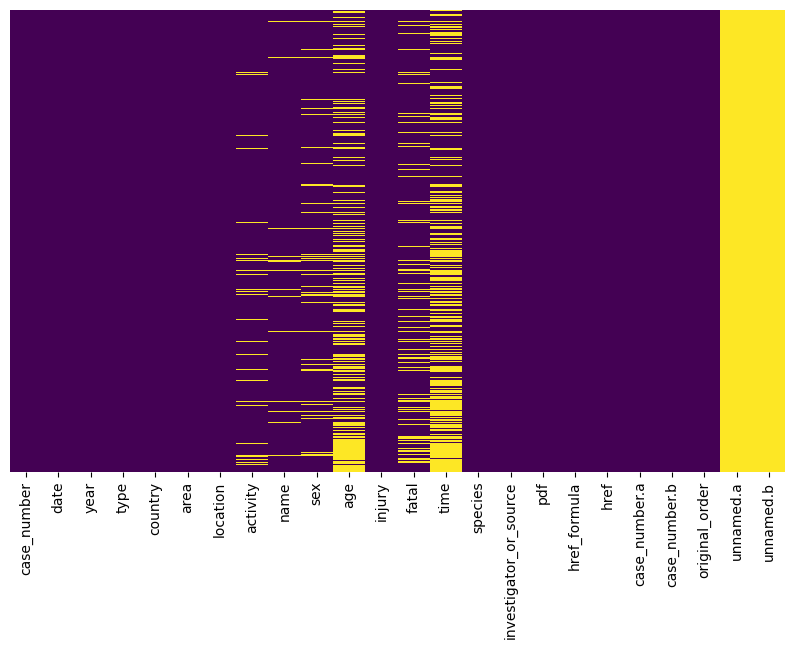

In [18]:
plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

In [19]:
na_rows=data.isnull().sum(axis=1)

len(na_rows[na_rows>3])

1009

In [20]:
dif_case_number=data.iloc[:][['date']].date.unique()

print(dif_case_number)

['25-Jun-2018' '08-Jun-2018' '04-Jun-2018' ... '1941-1942' '1940 - 1950'
 'Before 1906']


In [21]:
key_word = '\d{2}[-]\w{3}[-]\d{4}'

buscado=[]

for value in data.date:
    busq1= re.search(key_word, value)

    if(busq1==None):

        buscado.append(None)

    else:
        busq1=busq1.group(0)
        buscado.append(busq1)

len(buscado)



3203

In [22]:
data['fechas']=buscado

In [23]:
data.date = pd.to_datetime(data.fechas)

data.head()

,case_number,date,year,type,country,area,location,activity,name,sex,...,investigator_or_source,pdf,href_formula,href,case_number.a,case_number.b,original_order,unnamed.a,unnamed.b,fechas
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018
3,2018.06.08,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018
4,2018.06.04,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018
6,2018.06.03.a,2018-06-03,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,03-Jun-2018
7,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,27-May-2018


In [24]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

date                       291
activity                   190
name                        76
sex                        276
age                       1099
injury                       8
fatal                      443
time                      1347
investigator_or_source       7
unnamed.a                 3203
unnamed.b                 3203
fechas                     291
dtype: int64

In [25]:
data.dropna(inplace=True, subset=['date'])

In [26]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

activity                   156
name                        60
sex                        232
age                        899
injury                       6
fatal                      383
time                      1113
investigator_or_source       4
unnamed.a                 2912
unnamed.b                 2912
dtype: int64

In [27]:
#data= data.drop('years', axis=1)

from cmath import nan


data['years']=pd.DatetimeIndex(data.date).year


In [28]:
cols_obj= data.select_dtypes(include='object')

cols_obj.columns

Index(['case_number', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.a', 'case_number.b', 'unnamed.a', 'unnamed.b', 'fechas'],
      dtype='object')

In [29]:
for cols in cols_obj:
    data[cols] = data[cols].str.lower()
    data[cols] = data[cols].str.strip()
    data[cols] = data[cols].str.replace('\n',' ')



In [30]:
data= data.drop('fechas', axis=1)
data= data.drop('year', axis=1)

Arreglo la columna type

In [31]:
dif_case_number=data.iloc[:][['type']].type.unique()

data.loc[((data.type=='boating')),'type']='boat'

dif_case_number

array(['boating', 'unprovoked', 'provoked', 'invalid', 'questionable',
       'boat', 'sea disaster'], dtype=object)

In [32]:
dif_case_number=data.iloc[:][['country']].country.unique()
len(dif_case_number)

99

In [33]:
existing=[]
notexisting=[]
for country in dif_case_number:
    country=country.capitalize()
    if pycountry.countries.get(name=country)==None:
        notexisting.append(country)

notexisting_dict={'usa':'united states of america',
 'england':'united kingdom',
 'reunion':'reunion',
 'scotland':'united kingdom',
 'taiwan':'taiwan',
 'antigua':'antigua and barbuda',
 'russia':'russia',
 'turks & caicos':'turks and caicos',
 'united arab emirates (uae)':'united arab emirates',
 'vietnam':'vietnam',
 'st. maartin':'sint maarten',
 'grand cayman':'grand cayman',
 'south korea':'south korea',
 'venezuela':'venezuela',
 'micronesia':'federated states of micronesia',
 'okinawa':'japan',
 'egypt / israel':'egypt',
 'western samoa':'samoa',
 'british isles':'united kingdom',
 'columbia':'columbia',
 'new britain':'papua new guinea',
 'new guinea':'papua new guinea',
 'federated states of micronesia':'federated states of micronesia',
 'british west indies':'jamaica',
 'persian gulf':'iran',
 'north pacific ocean':'',
 'north sea':'united kingdom',
 'pacific ocean':'',
 'north atlantic ocean':'',
 'iran':'iran',
 'indian ocean':'',
 'cape verde':'cape verde'}



data=data.replace({"country": notexisting_dict})




Columna AREA modificada

In [34]:
dif_area_number=data.iloc[:][['area']].area.unique()
dif_area_number

key_word2= '[(](.*?)[)]'

buscado2=[]

for value in data.area:
    busq2= re.search(key_word2, value)

    if(busq2==None):

        buscado2.append(value)

    else:
        busq2=busq2.group(0)
        busq2=value.removesuffix(busq2)
        busq2=busq2.strip()
        buscado2.append(busq2)
len(buscado2)

data['area2']=buscado2

In [35]:
dif_area_number2=data.iloc[:][['area2']].area2.unique()
dif_area_number2

array(['california', 'new south wales', 'colima', 'pernambuco', 'florida',
       'queensland', 'cornwall', 'cocos island', 'western australia',
       'alifu alifu atoll', 'western cape province', 'hawaii', 'hua hin',
       'new providence', 'alagoas', 'eastern cape province',
       'kwazulu-natal', 'boi island, victoria', 'galapagos islands',
       'fernando de noronha', 'sepang', 'holquin province',
       'south australia', 'north island', 'new york', 'canary islands',
       'victoria', 'castellón', 'massachusetts', 'south carolina',
       'red sea protectorate', 'new jersey', 'majorca', 'washington',
       'tabasco', 'anjouan', 'south devon', 'luzon island', 'bali',
       'alicante province', 'abaco islands', 'alabama', 'texas',
       'north carolina', 'suez', 'tuamotos', 'grand terre',
       'santa catarina state', 'grand cayman', 'tasmania',
       'balneário camboriú', 'fujairah emirate', 'grand canary island',
       'phuket', 'alicante', 'grand bahama island', 'le po

In [36]:
dif_location=data.iloc[:][['location']].location.unique()
dif_location

array(['oceanside, san diego county', 'arrawarra headland', 'la ticla',
       ..., 'tahiti', 'brighton', 'capistrano, orange county'],
      dtype=object)

In [37]:
data = data.reset_index()

In [38]:
list3=[]

loca_filas = data[((data.location=='moya')|(data.location=='maui')|(data.location=='anau')|(data.location=='freo')|(data.location=='kona')|(data.location=='pina')|(data.location=='freo')|(data.location=='maui')|(data.location=='poum')|(data.location=='iyo')|(data.location=='ika')|(data.location=='maui')|(data.location=='pula')|(data.location=='mito')|(data.location=='ghat'))].index

for value in data.location:
    
    
    if len(value) <5:
        list3.append(value)

list3
#loca_filas

data.iloc[loca_filas][['country', 'area', 'location']]



,country,area,location
76,comoros,anjouan,moya
116,united states of america,hawaii,maui
252,french polynesia,bora bora,anau
273,australia,western australia,freo
647,united states of america,hawaii,kona
840,brazil,pernambuco,pina
924,united states of america,hawaii,maui
1249,new caledonia,north province,poum
1488,japan,ehime prefecture,iyo
1969,croatia,istria county,ika


In [39]:
list3=[]
question = "?"

for value in data.location:
    if '?' in value:
        list3.append(value)
        

list3

['perth? (margaret river district)',
 'perth? (margaret river district)',
 'palm beach?',
 'botany bay?',
 'goat rock, bodega bay, sonoma county?',
 'moš?eni?ka draga',
 'hadrian’s (haidana?) island, near port moresby',
 'lyttleton?']

In [40]:
location_bad={'pina': 'recife',
'freo': 'fremantle',

'perth? (margaret river district)': '',
 'perth? (margaret river district)': '',
 'palm beach?': '',
 'botany bay?': '',
 'goat rock, bodega bay, sonoma county?': '',
 'moš?eni?ka draga': '',
 'hadrian’s (haidana?) island, near port moresby': '',
 'lyttleton?': ''}

In [41]:
data=data.replace({"location": location_bad})



In [42]:
dif_activity=data.iloc[:][['activity']].activity.unique()
dif_activity

array(['paddling', 'surfing', 'free diving', 'swimming', 'fishing',
       'walking', 'feeding sharks', 'scuba diving', 'paddle-skiing',
       'body boarding', 'stand-up paddleboarding', 'wading',
       'cleaning fish', 'snorkeling', 'spearfishing', nan, 'diving',
       'fishing / wading', 'night bathing', 'kayaking / fishing',
       'kayaking', 'body surfing', 'sup', 'touching a shark',
       'attempting to lasso a shark', 'grabbing shark for a selfie',
       'kayak fishing', 'tagging sharks', 'surf skiing', 'surf fishing',
       'floating', 'sup foil boarding', 'lobstering',
       'fishing in alabama deep fishing rodeo', 'kite surfing',
       'fishing for squid', 'fishing for sharks', 'floating in tube',
       'standing', 'teasing a shark', 'surf-skiing', 'feeding stingrays?',
       'paddle boarding', 'scallop diving on hookah', 'treading water',
       'playing in the water', 'boogie boarding', 'playing',
       'attempting to rescue a shark', 'photographing the shark',
 

In [43]:
data[['activity']]= data[['activity']].fillna('other')

In [44]:
activities= ['dive','scuba','surf','investigating','sailor','ski','paddle','film','adrift','play','boat','sunbath','walk','floating','yacht','catching','spear','capsized','crashed','vessel','other''bath','snorkeling', 'spearfishing','paddling', 'surfing', 'free diving', 'swimming', 'fishing','walking', 'feeding sharks', 'scuba diving', 'paddle','skiing','body boarding','fishing','swim','swiming','diving','surfing','bath']
list4=[]

encontrado=''

for value in data.activity:
    encontrado='other'
    for action in activities:
        if action in value:
            encontrado=action
            
    list4.append(encontrado)


data['activity2']=list4

dif_activity2=data.iloc[:][['activity2']].activity2.unique()
dif_activity2


array(['paddling', 'surfing', 'diving', 'swim', 'fishing', 'walking',
       'feeding sharks', 'skiing', 'body boarding', 'paddle', 'other',
       'snorkeling', 'bath', 'floating', 'play', 'film', 'spear', 'yacht',
       'boat', 'surf', 'crashed', 'adrift', 'dive', 'capsized', 'vessel',
       'ski', 'investigating', 'catching'], dtype=object)

In [45]:
dif_name=data.iloc[:][['name']].name.unique()


In [46]:
data[['name']]= data[['name']].fillna('other')

In [47]:

list5=[]
alphabet = " 'abcdefghijklmnopqrstuvwxyzáãèéíïóöúü‘’"
characters=" \n.:0123456789)({][}@&%"

for value in data.name:
    cont=False
    for char in value:
        if char not in alphabet:
            cont=True
            value='other'

    if value =='male' or value=='female':
        value='other'

    if 'and' in value:
        value='other'
            
    list5.append(value)


list5

data['name2']=list5


In [48]:
dif_sex=data.iloc[:][['sex']].sex.unique()

dif_sex

array(['f', 'm', nan, 'lli', 'n', '.'], dtype=object)

In [49]:
data[['sex']]= data[['sex']].fillna('unknown')

sex_bad={'lli':'unknown', 'n':'unknown', '.':'unknown',}

data=data.replace({"sex": sex_bad})

data.iloc[:][['sex']]


,sex
0,f
1,m
2,m
3,m
4,m
...,...
2907,m
2908,m
2909,f
2910,m


In [50]:
dif_age=data.iloc[:][['age']].age.unique()

dif_age

array(['57', nan, '18', '52', '15', '32', '21', '30', '60', '33', '29',
       '54', '56', '19', '25', '10', '38', '55', '35', '46', '45', '14',
       '28', '20', '24', '26', '49', '22', '7', '31', '40', '13', '37',
       '11', '69', '34', '8', '50', '48', '17', '68', '65', '73', '58',
       '36', '60s', '51', '43', '61', '59', '42', '6', '27', '23', '39',
       '12', 'teen', '41', '71', '9', '44', '62', '16', '47', '63', '70',
       '18 months', '40s', '53', '20s', '30s', '66', '74', '3', '64',
       '28 & 26', '18 or 20', '77', '36 & 26', '8 or 10', '84', '',
       '30 or 36', '6½', '21 & ?', '75', '23 & 20', '5', '16 to 18', '67',
       'mid-20s', '>50', 'adult', '9 & 12', '? & 19', '33 & 37',
       '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', '30 & 32', '50 & 30',
       '17 & 35', '13 or 18', 'make line green', '"young"', '17 & 16',
       'both 11', '9 or 10'], dtype=object)

In [51]:
data[['age']]= data[['age']].fillna('unknown')

In [52]:


list6=[]
alphabet = " 'abcdefghijklmnopqrstuvwxyzáãèéíïóöúü‘’"
characters=" \n.:0123456789)({][}@&%"
numbers='0123456789'

for value in data.age:
    for char in value:
        if char not in numbers:
            value='unknown'
    if value=='':
        value='unknown'
          
    list6.append(value)

data['age2']=list6

dif_age2=data.iloc[:][['age2']].age2.unique()



In [53]:
dif_injury=data.iloc[:][['injury']].injury.unique()

print(dif_injury)

['no injury to occupant, outrigger canoe and paddle damaged'
 'minor injury to lower leg'
 'lacerations to leg & hand shark provoked incident' ...
 'torso bitten but may have been postmortem'
 'human remains recovered from 4.9 m shark'
 'human remains recovered from shark']


In [54]:
data[['injury']]= data[['injury']].fillna('unknown')

In [55]:
injury= ['wound','injuries','injuries','lacerated', 'laceration','avulsion', 'bite', 'bitten', 'minor injury', 'cut', 'puncture wounds', 'scratch', 'fatal','abrasions', 'severed', 'bruised','no injury', 'uninjured' ]
list7=[]

encontrado=''

for value in data.injury:
    encontrado='unknown'
    for danyo in injury:
        if danyo in value:
            encontrado=danyo
            
    list7.append(encontrado)

data['injury2']=list7


In [56]:
dif_injury2=data.iloc[:][['injury2']].injury2.unique()
dif_injury2

array(['no injury', 'minor injury', 'laceration', 'fatal', 'bitten',
       'bite', 'unknown', 'cut', 'injuries', 'puncture wounds',
       'abrasions', 'severed', 'lacerated', 'wound', 'bruised',
       'avulsion', 'scratch', 'uninjured'], dtype=object)

In [57]:
injury_dict={

'uninjured':'no injury',
'lacerated':'lacerations',
'bite':'bitten'}

In [58]:
data=data.replace({"injury2": injury_dict})

In [59]:
dif_fatal=data.iloc[:][['fatal']].fatal.unique()
dif_fatal

array(['n', 'y', nan, 'm', '2017', 'unknown'], dtype=object)

In [60]:
data[['fatal']]= data[['fatal']].fillna('unknown')

fatal_bad={'m':'unknown', '2017':'unknown'}

data=data.replace({"fatal": fatal_bad})



In [61]:
data.iloc[:][['injury2','fatal']]

,injury2,fatal
0,no injury,n
1,minor injury,n
2,laceration,n
3,fatal,y
4,minor injury,n
...,...,...
2907,fatal,y
2908,fatal,y
2909,fatal,y
2910,unknown,y


In [62]:
data.loc[((data.fatal=='y')& ((data.injury2=='unknown'))),'injury2']='fatal'

In [63]:
data.iloc[:][['injury2','fatal']]

,injury2,fatal
0,no injury,n
1,minor injury,n
2,laceration,n
3,fatal,y
4,minor injury,n
...,...,...
2907,fatal,y
2908,fatal,y
2909,fatal,y
2910,fatal,y


In [64]:
dif_time=data.iloc[:][['time']].time.unique()
dif_time

array(['18h00', nan, 'late afternoon', '17h00', 'morning', '08h15',
       '10h30', '10h40', '07h00', '09h30', 'afternoon', '21h50', '09h40',
       '15h00', '17h35', '19h00, dusk', '16h00', '08h00', '15h01',
       '13h45', '23h30', '09h00', '14h30', '18h30', '12h30', '15h30',
       '14h00', '18h45', '06h00', 'midday', '10h00', '13h30', '10h45',
       '11h20', '07h45', '11h00', '19h30', '08h30', '15h45',
       'shortly before 12h00', '08h50', '12h00', '07h30', '02h00', '9h00',
       '15h15', '16h30', '11h30', 'after noon', '22h00', '16h20', '15h25',
       '17h30', '13h20', 'midnight', '09h30 / 10h00', '10h15', '18h15',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h40', '19h45', '19h00', '10h10', '08h45', '12h10',
       '18h05', '12h25', '17h51', '16h12', '12h45', '10h50', '14h15',
       '13h00', '09h45', '11h45', '06h45', '05h00', '03h30', '11h15',
       '06h30', '20h00', '16h40', '16h18', '11h10', '17h50', 'night',
       '08h20', '20h

In [65]:
data[['time']]= data[['time']].fillna('unknown')

key_word3 = '\d{2}\w{1}\d{2}'

buscado3=[]

for value in data.time:
    busq3= re.search(key_word3, value)

    if(busq3==None):

        buscado3.append('unknown')

    else:
        busq3=busq3.group(0)
        buscado3.append(busq3)

data['time2']=buscado3

len(buscado3)

2912

In [66]:
dif_species=data.iloc[:][['species']].species.unique()


In [67]:
file='../support_files/shark-species.txt'
shark_list=''
with open(file, 'r') as f:
    for linea in f:
        if ': ' in linea:
            shark_list = f.read()

list_tiburones=[]

shark_list=shark_list.splitlines()

for tiburon in shark_list:
    tiburon=tiburon.split(': ')
    if len(tiburon)==2:
        especie=tiburon[1].split(' ')
        list_tiburones.append(especie[0])


In [68]:

list8=[]

for value in data.species:
    encontrado='unknown'
    for tipo in list_tiburones:
        if tipo.lower() in value:
            encontrado=tipo
            
    list8.append(encontrado)

data['species2']=list8


In [69]:
data.head()

,index,case_number,date,type,country,area,location,activity,name,sex,...,unnamed.a,unnamed.b,years,area2,activity2,name2,age2,injury2,time2,species2
0,0,2018.06.25,2018-06-25,boat,united states of america,california,"oceanside, san diego county",paddling,julie wolfe,f,...,NaN,NaN,2018,california,paddling,julie wolfe,57,no injury,18h00,White
1,3,2018.06.08,2018-06-08,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,...,NaN,NaN,2018,new south wales,surfing,other,unknown,minor injury,unknown,unknown
2,4,2018.06.04,2018-06-04,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,...,NaN,NaN,2018,colima,diving,gustavo ramos,unknown,laceration,unknown,Tiger
3,6,2018.06.03.a,2018-06-03,unprovoked,brazil,pernambuco,"piedade beach, recife",swimming,jose ernesto da silva,m,...,NaN,NaN,2018,pernambuco,swim,jose ernesto da silva,18,fatal,unknown,Tiger
4,7,2018.05.27,2018-05-27,unprovoked,united states of america,florida,"lighhouse point park, ponce inlet, volusia county",fishing,male,m,...,NaN,NaN,2018,florida,fishing,other,52,minor injury,unknown,Lemon


In [70]:
data = data.drop(['area', 'activity', 'name','age','injury', 'species', 'time'], axis=1)



In [71]:
data = data.reset_index()

In [72]:
data = data.drop(['level_0', 'index'], axis=1)

In [73]:
data.head()

,case_number,date,type,country,location,sex,fatal,investigator_or_source,pdf,href_formula,...,unnamed.a,unnamed.b,years,area2,activity2,name2,age2,injury2,time2,species2
0,2018.06.25,2018-06-25,boat,united states of america,"oceanside, san diego county",f,n,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,NaN,NaN,2018,california,paddling,julie wolfe,57,no injury,18h00,White
1,2018.06.08,2018-06-08,unprovoked,australia,arrawarra headland,m,n,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,NaN,NaN,2018,new south wales,surfing,other,unknown,minor injury,unknown,unknown
2,2018.06.04,2018-06-04,provoked,mexico,la ticla,m,n,a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,NaN,NaN,2018,colima,diving,gustavo ramos,unknown,laceration,unknown,Tiger
3,2018.06.03.a,2018-06-03,unprovoked,brazil,"piedade beach, recife",m,y,"diario de pernambuco, 6/4/2018",2018.06.03.a-dasilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,NaN,NaN,2018,pernambuco,swim,jose ernesto da silva,18,fatal,unknown,Tiger
4,2018.05.27,2018-05-27,unprovoked,united states of america,"lighhouse point park, ponce inlet, volusia county",m,n,"k. mcmurray, trackingsharks.com",2018.05.27-ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,NaN,NaN,2018,florida,fishing,other,52,minor injury,unknown,Lemon


In [74]:
case_n=[]

for i in range(len(data.index)):
    fill= len(data.index)-i
    case_n.append(fill)
case_n   

data['case_number']=case_n



In [75]:
new_cols = [c.replace('2', '') for c in data.columns]

dict(zip(data.columns, new_cols))

data = data.rename(columns={k:v for k,v in zip(data.columns, new_cols)}) # k=columna vieja, v= columna nueva



In [76]:
data[['unnamed.a']]= data[['unnamed.a']].fillna('unknown')
data[['unnamed.b']]= data[['unnamed.b']].fillna('unknown')
data[['investigator_or_source']]= data[['investigator_or_source']].fillna('unknown')

In [77]:
data.head()

,case_number,date,type,country,location,sex,fatal,investigator_or_source,pdf,href_formula,...,unnamed.a,unnamed.b,years,area,activity,name,age,injury,time,species
0,2912,2018-06-25,boat,united states of america,"oceanside, san diego county",f,n,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,unknown,unknown,2018,california,paddling,julie wolfe,57,no injury,18h00,White
1,2911,2018-06-08,unprovoked,australia,arrawarra headland,m,n,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,unknown,unknown,2018,new south wales,surfing,other,unknown,minor injury,unknown,unknown
2,2910,2018-06-04,provoked,mexico,la ticla,m,n,a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,unknown,unknown,2018,colima,diving,gustavo ramos,unknown,laceration,unknown,Tiger
3,2909,2018-06-03,unprovoked,brazil,"piedade beach, recife",m,y,"diario de pernambuco, 6/4/2018",2018.06.03.a-dasilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,unknown,unknown,2018,pernambuco,swim,jose ernesto da silva,18,fatal,unknown,Tiger
4,2908,2018-05-27,unprovoked,united states of america,"lighhouse point park, ponce inlet, volusia county",m,n,"k. mcmurray, trackingsharks.com",2018.05.27-ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,...,unknown,unknown,2018,florida,fishing,other,52,minor injury,unknown,Lemon


In [78]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

Series([], dtype: int64)

In [79]:
cols_obj= data.select_dtypes(include='object')

for cols in cols_obj:
    data[cols] = data[cols].str.upper()

In [80]:
for c in data.select_dtypes('object').columns:
    data[c]=data[c].astype('category')

'''for c in data.select_dtypes('integer').columns:
    data[c]=data[c].astype('integer')'''

for c in data.select_dtypes('float').columns:
    data[c]=data[c].astype('float')

data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   case_number             2912 non-null   int64         
 1   date                    2912 non-null   datetime64[ns]
 2   type                    2912 non-null   category      
 3   country                 2912 non-null   category      
 4   location                2912 non-null   category      
 5   sex                     2912 non-null   category      
 6   fatal                   2912 non-null   category      
 7   investigator_or_source  2912 non-null   category      
 8   pdf                     2912 non-null   category      
 9   href_formula            2912 non-null   category      
 10  href                    2912 non-null   category      
 11  case_number.a           2912 non-null   category      
 12  case_number.b           2912 non-null   category

In [81]:
data.head()

,case_number,date,type,country,location,sex,fatal,investigator_or_source,pdf,href_formula,...,unnamed.a,unnamed.b,years,area,activity,name,age,injury,time,species
0,2912,2018-06-25,BOAT,UNITED STATES OF AMERICA,"OCEANSIDE, SAN DIEGO COUNTY",F,N,"R. COLLIER, GSAF",2018.06.25-WOLFE.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2018,CALIFORNIA,PADDLING,JULIE WOLFE,57,NO INJURY,18H00,WHITE
1,2911,2018-06-08,UNPROVOKED,AUSTRALIA,ARRAWARRA HEADLAND,M,N,"B. MYATT, GSAF",2018.06.08-ARRAWARRA.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2018,NEW SOUTH WALES,SURFING,OTHER,UNKNOWN,MINOR INJURY,UNKNOWN,UNKNOWN
2,2910,2018-06-04,PROVOKED,MEXICO,LA TICLA,M,N,A .KIPPER,2018.06.04-RAMOS.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2018,COLIMA,DIVING,GUSTAVO RAMOS,UNKNOWN,LACERATION,UNKNOWN,TIGER
3,2909,2018-06-03,UNPROVOKED,BRAZIL,"PIEDADE BEACH, RECIFE",M,Y,"DIARIO DE PERNAMBUCO, 6/4/2018",2018.06.03.A-DASILVA.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2018,PERNAMBUCO,SWIM,JOSE ERNESTO DA SILVA,18,FATAL,UNKNOWN,TIGER
4,2908,2018-05-27,UNPROVOKED,UNITED STATES OF AMERICA,"LIGHHOUSE POINT PARK, PONCE INLET, VOLUSIA COUNTY",M,N,"K. MCMURRAY, TRACKINGSHARKS.COM",2018.05.27-PONCE.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2018,FLORIDA,FISHING,OTHER,52,MINOR INJURY,UNKNOWN,LEMON


In [82]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   case_number             2912 non-null   int64         
 1   date                    2912 non-null   datetime64[ns]
 2   type                    2912 non-null   category      
 3   country                 2912 non-null   category      
 4   location                2912 non-null   category      
 5   sex                     2912 non-null   category      
 6   fatal                   2912 non-null   category      
 7   investigator_or_source  2912 non-null   category      
 8   pdf                     2912 non-null   category      
 9   href_formula            2912 non-null   category      
 10  href                    2912 non-null   category      
 11  case_number.a           2912 non-null   category      
 12  case_number.b           2912 non-null   category

In [83]:
data.to_csv('./sharks_clean.csv', index=False, sep=';')

PermissionError: [Errno 13] Permission denied: './sharks_clean.csv'

In [ ]:
data.iloc[50:70]

,case_number,date,type,country,location,sex,fatal,investigator_or_source,pdf,href_formula,...,unnamed.a,unnamed.b,years,area,activity,name,age,injury,time,species
50,2862,2017-09-25,UNPROVOKED,AUSTRALIA,GRACETOWN,M,N,"STAB MAGAZINE, 9/26/2017",2017.09.25.A-VISSERS.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,WESTERN AUSTRALIA,SURFING,CATHERINE VISSERS,UNKNOWN,NO INJURY,18H00,WHITE
51,2861,2017-09-24,INVALID,UNITED STATES OF AMERICA,ROCKAWAY,M,UNKNOWN,"S. CURATOLO-WAGEMAN, GSAF",2017.09.24.B-BEHREND.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,NEW YORK,SURFING,MICHAH BEHREND,33,LACERATION,15H30,UNKNOWN
52,2860,2017-09-24,UNPROVOKED,UNITED STATES OF AMERICA,FORT WORTH,M,N,"SUN SENTINEL, 9/24/2017",2017.09.24.A-FORTWORTH.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,FLORIDA,SURFING,OTHER,UNKNOWN,LACERATION,14H00,UNKNOWN
53,2859,2017-09-16,UNPROVOKED,SPAIN,GRAN CANARIA,M,N,TURISMO LA ALDEA,2017.09.16.B-GRANDCANARY.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,CANARY ISLANDS,SURFING,OTHER,13,LACERATION,UNKNOWN,PORBEAGLE
54,2858,2017-09-13,UNPROVOKED,UNITED STATES OF AMERICA,"PONCE INLET, VOLUSIA COUNTY",M,N,"TRACKINGSHARKS.COM, 10/22/2017",2017.09.13-LOYD.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,FLORIDA,SURFING,BENJAMIN LOYD,18,LACERATION,18H45,UNKNOWN
55,2857,2017-09-10,UNPROVOKED,AUSTRALIA,ILUKA BEACH,M,N,"B. MYATT, GSAF",2017.09.10.A-MCGRATH.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,NEW SOUTH WALES,SURFING,ABE MCGRATH,35,LACERATION,06H00,WHITE
56,2856,2017-09-02,UNPROVOKED,UNITED STATES OF AMERICA,"MARATHON, MONROE COUNTY",M,N,NEWSFLARE,2017.09.02.C-MACCARTY.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,FLORIDA,SWIM,ERVIN MACCARTY,UNKNOWN,LACERATION,UNKNOWN,NURSE
57,2855,2017-08-29,UNPROVOKED,AUSTRALIA,CATHEDRAL ROCK,M,N,"B. MYATT, GSAF",2017.08.27-BRUNDLER.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,VICTORIA,SURFING,MARCEL BRUNDLER,37,NO INJURY,10H30,WHITE
58,2854,2017-08-26,INVALID,SPAIN,GRAO DE MONCOFA,F,UNKNOWN,"EL PERIODICO MEDITERRANEO, 8/27/2017",2017.08.26.B-SPAIN.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,CASTELLÓN,SWIM,OTHER,11,LACERATION,UNKNOWN,UNKNOWN
59,2853,2017-08-23,UNPROVOKED,UNITED STATES OF AMERICA,"MARCONI BEACH, WELLFLEET, BARNSTABLE COUNTY",M,N,"CAPE COD TIMES, 8/23/2017",2017.08.23-BIGELOW.PDF,HTTP://SHARKATTACKFILE.NET/SPREADSHEETS/PDF_DI...,...,UNKNOWN,UNKNOWN,2017,MASSACHUSETTS,OTHER,OTHER,69,BITTEN,10H00,WHITE


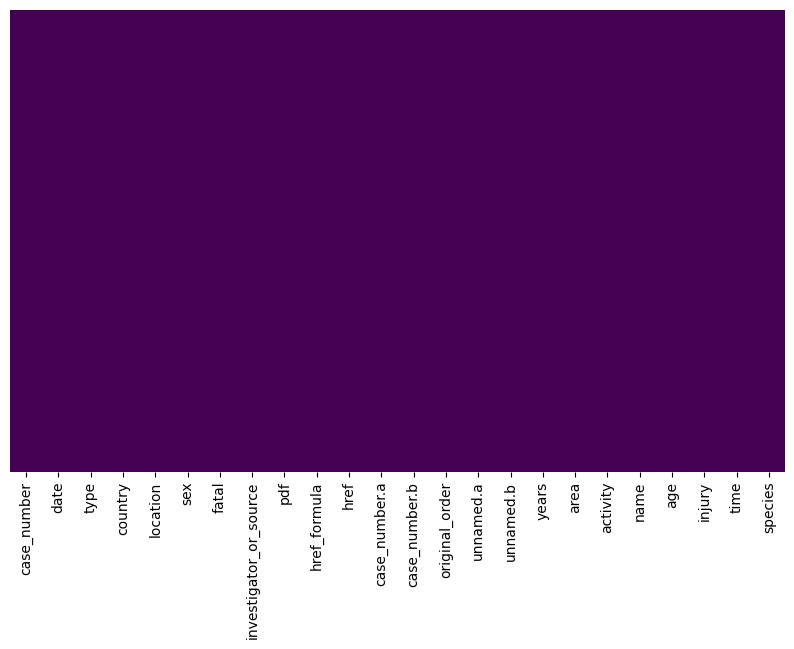

In [ ]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show();

In [85]:
uniqueValues = data.nunique()

uniqueValues

case_number               2912
date                      2650
type                         6
country                     84
location                  2264
sex                          3
fatal                        3
investigator_or_source    2381
pdf                       2910
href_formula              2910
href                      2905
case_number.a             2905
case_number.b             2906
original_order            2912
unnamed.a                    1
unnamed.b                    1
years                      161
area                       363
activity                    28
name                      2001
age                         74
injury                      16
time                       199
species                     37
dtype: int64